In [1]:
import os, shutil
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
original_dataset_dir = './train/'

base_dir = './data/cats_and_dogs'
if not os.path.exists(base_dir):
    os.mkdir(base_dir)

In [3]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [4]:
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

In [5]:
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [6]:
fnames = ['cat.{}.jpg'.format(i) for i in range(10000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname) #source
    dst = os.path.join(train_cats_dir, fname) #destination
    shutil.copyfile(src, dst) #src에 있는 파일을 dst에 복사

In [7]:
fnames = ['cat.{}.jpg'.format(i) for i in range(10000, 12500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname) #source
    dst = os.path.join(test_cats_dir, fname) #destination
    shutil.copyfile(src, dst) #src에 있는 파일을 dst에 복사

In [8]:
fnames = ['dog.{}.jpg'.format(i) for i in range(10000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname) #source
    dst = os.path.join(train_dogs_dir, fname) #destination
    shutil.copyfile(src, dst) #src에 있는 파일을 dst에 복사

In [9]:
fnames = ['dog.{}.jpg'.format(i) for i in range(10000, 12500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname) #source
    dst = os.path.join(test_dogs_dir, fname) #destination
    shutil.copyfile(src, dst) #src에 있는 파일을 dst에 복사

In [10]:
print('훈련용 고양이 이미지 전체 개수:', len(os.listdir(train_cats_dir)))
print('훈련용 강아지 이미지 전체 개수:', len(os.listdir(train_dogs_dir)))
print('테스트용 고양이 이미지 전체 개수:', len(os.listdir(test_cats_dir)))
print('테스트용 강아지 이미지 전체 개수:', len(os.listdir(test_dogs_dir)))

훈련용 고양이 이미지 전체 개수: 10000
훈련용 강아지 이미지 전체 개수: 10000
테스트용 고양이 이미지 전체 개수: 2500
테스트용 강아지 이미지 전체 개수: 2500


In [11]:
from tensorflow.keras import models, layers

In [12]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), input_shape=(150, 150, 3), activation='relu'))
#input_shape=() 데이터를 보면 모양이 다양함 일단은 여기서 150*150으로 하고 하단에서 맞출것
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

model.add(layers.Conv2D(32, (3,3), input_shape=(150, 150, 3), activation='relu'))   
1x(3x3)x32x3 +32 = **896**  
output shape 148x148   
output은 채널이 1개로 출력됨


model.add(layers.MaxPooling2D((2,2)))   
output shape 74x74   


model.add(layers.Conv2D(64, (3,3), activation='relu'))   
32x(3x3)x64 +64 = **18,496**   
output shape 72x72   


model.add(layers.MaxPooling2D((2,2)))   
output shape 36x36   


model.add(layers.Conv2D(128, (3,3), activation='relu'))   
64x(3x3)x128 +128 = **73,856**   
output shape 34x34   


model.add(layers.MaxPooling2D((2,2)))   
output shape 17x17   


model.add(layers.Conv2D(128, (3,3), activation='relu'))   
128x(3x3)x128 +128 =**147,584**   
output shape 15x15   


model.add(layers.MaxPooling2D((2,2)))   
output shape 7x7   


model.add(layers.Flatten())   
output (7x7)x128 =6,272   


model.add(layers.Dropout(0.5))   
파라미터 영향x   


model.add(layers.Dense(512, activation='relu'))   
6272x512 +512 =**3,211,776**   


model.add(layers.Dense(1, activation='sigmoid'))   
512x1 +1 =**513**   


In [14]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255) #입력 feature값 0~1 사이로 1.:실수(정수x)
test_datagen = ImageDataGenerator(rescale=1./255) #입력 feature값 0~1 사이로

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(150, 150), batch_size=20, class_mode='binary' 
)

validation_generator = test_datagen.flow_from_directory(
    test_dir, #학습용 데이터 위치
    target_size=(150, 150), 
    batch_size=20, #20장씩 무작위 추출
    class_mode='binary' #class가 2개이므로
)


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [16]:
history = model.fit(train_generator, epochs=30, validation_data=validation_generator)
# 아래 값은 임의로 epochs=5로 지정하고 해본것임

Epoch 1/5
1000/1000 [==============================] - 248s 247ms/step - loss: 0.6711 - accuracy: 0.5695 - val_loss: 0.6270 - val_accuracy: 0.6552
Epoch 2/5
1000/1000 [==============================] - 210s 210ms/step - loss: 0.5527 - accuracy: 0.7152 - val_loss: 0.4642 - val_accuracy: 0.7778
Epoch 3/5
1000/1000 [==============================] - 206s 206ms/step - loss: 0.4527 - accuracy: 0.7895 - val_loss: 0.4118 - val_accuracy: 0.8062
Epoch 4/5
1000/1000 [==============================] - 203s 203ms/step - loss: 0.3847 - accuracy: 0.8273 - val_loss: 0.3425 - val_accuracy: 0.8474
Epoch 5/5
1000/1000 [==============================] - 215s 215ms/step - loss: 0.3305 - accuracy: 0.8555 - val_loss: 0.3438 - val_accuracy: 0.8468


In [17]:
history

In [18]:
import matplotlib.pyplot as plt

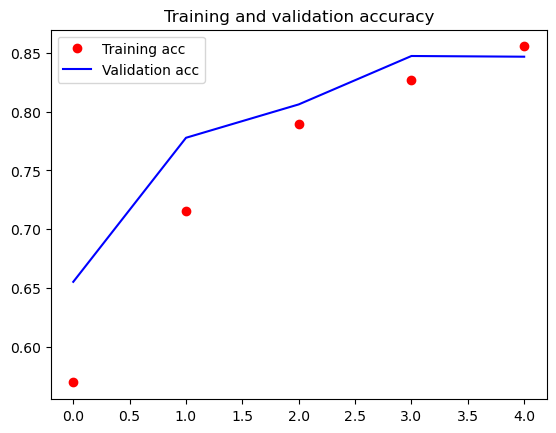

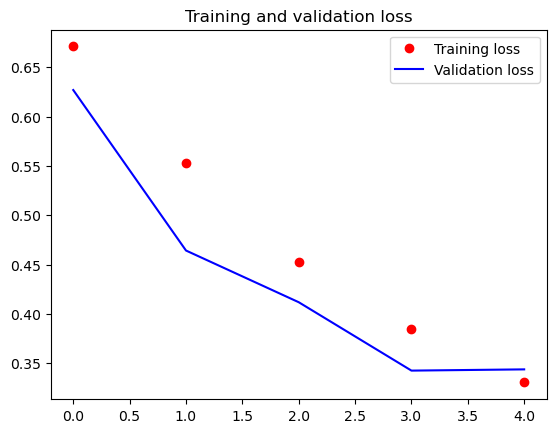

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

참고 도서 케라스 창시자에게 배우는 딥러닝 개정 2판 8장 컴퓨터 비전을 위한 딥러닝(https://thebook.io/080315/) 